In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [2]:
import pandas as pd

# Reemplaza 'nombre_archivo.csv' con el nombre de tu archivo CSV
archivo_csv = 'C:/Users/Usuario/PI_2/DATA_LIMPIO/Totales Accesos por rango.csv'

# Carga el archivo CSV en un DataFrame
df_Totales_Accesos_por_rango = pd.read_csv(archivo_csv)

# Muestra las primeras 5 filas del DataFrame
print(f"Mostrando las primeras 5 filas de {archivo_csv}:")
print(df_Totales_Accesos_por_rango.head())

Mostrando las primeras 5 filas de C:/Users/Usuario/PI_2/DATA_LIMPIO/Totales Accesos por rango.csv:
    Año  Trimestre  Hasta 512 kbps  Entre 512 Kbps y 1 Mbps  \
0  2024          2           28151                    67024   
1  2024          1           28801                    69355   
2  2023          4           29708                    71742   
3  2023          3           30274                    80609   
4  2023          2           30827                    79405   

   Entre 1 Mbps y 6 Mbps  Entre 6 Mbps y 10 Mbps  Entre 10 Mbps y 20 Mbps  \
0                 840200                  911374                   662649   
1                 866152                  950930                   672155   
2                 900253                  978108                   697232   
3                 945608                  998725                   720084   
4                 963510                 1028250                   734125   

   Entre 20 Mbps y 30 Mbps  Más de 30 Mbps   OTROS     Tota

In [3]:
# Ver la estructura del DataFrame
print(f"Estructura del DataFrame {archivo_csv}:")
df_Totales_Accesos_por_rango.info()

# Verificar la existencia de valores nulos
print("\nConteo de valores nulos por columna:")
print(df_Totales_Accesos_por_rango.isnull().sum())

# Verificar la existencia de valores negativos
print("\nVerificando valores negativos:")
# Consideramos que todas las columnas numéricas son relevantes para esta revisión
numericas = df_Totales_Accesos_por_rango.select_dtypes(include=['number'])
valores_negativos = (numericas < 0).sum()
print(valores_negativos[valores_negativos > 0])



Estructura del DataFrame C:/Users/Usuario/PI_2/DATA_LIMPIO/Totales Accesos por rango.csv:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Año                      42 non-null     int64
 1   Trimestre                42 non-null     int64
 2   Hasta 512 kbps           42 non-null     int64
 3   Entre 512 Kbps y 1 Mbps  42 non-null     int64
 4   Entre 1 Mbps y 6 Mbps    42 non-null     int64
 5   Entre 6 Mbps y 10 Mbps   42 non-null     int64
 6   Entre 10 Mbps y 20 Mbps  42 non-null     int64
 7   Entre 20 Mbps y 30 Mbps  42 non-null     int64
 8   Más de 30 Mbps           42 non-null     int64
 9   OTROS                    42 non-null     int64
 10  Total                    42 non-null     int64
dtypes: int64(11)
memory usage: 3.7 KB

Conteo de valores nulos por columna:
Año                        0
Trimestre                

In [4]:
# 1. Convertir 'Año' a tipo fecha y extraer solo el año como numérico
df_Totales_Accesos_por_rango['Año'] = pd.to_datetime(df_Totales_Accesos_por_rango['Año'], format='%Y').dt.year

# Convertir 'Trimestre' a un periodo trimestral
# Asegúrate de que la columna 'Trimestre' tenga valores válidos para la conversión (1, 2, 3, 4).
df_Totales_Accesos_por_rango['Trimestre'] = pd.PeriodIndex.from_fields(
    year=df_Totales_Accesos_por_rango['Año'], 
    quarter=df_Totales_Accesos_por_rango['Trimestre'], 
    freq='Q'
)

# 2. Filtrar datos entre 2018 y 2024
df_Totales_Accesos_por_rango = df_Totales_Accesos_por_rango[
    (df_Totales_Accesos_por_rango['Año'] >= 2018) & 
    (df_Totales_Accesos_por_rango['Año'] <= 2024)
]

# Muestra las primeras filas para verificar los cambios
print("DataFrame después de las transformaciones:")
print(df_Totales_Accesos_por_rango.head())

DataFrame después de las transformaciones:
    Año Trimestre  Hasta 512 kbps  Entre 512 Kbps y 1 Mbps  \
0  2024    2024Q2           28151                    67024   
1  2024    2024Q1           28801                    69355   
2  2023    2023Q4           29708                    71742   
3  2023    2023Q3           30274                    80609   
4  2023    2023Q2           30827                    79405   

   Entre 1 Mbps y 6 Mbps  Entre 6 Mbps y 10 Mbps  Entre 10 Mbps y 20 Mbps  \
0                 840200                  911374                   662649   
1                 866152                  950930                   672155   
2                 900253                  978108                   697232   
3                 945608                  998725                   720084   
4                 963510                 1028250                   734125   

   Entre 20 Mbps y 30 Mbps  Más de 30 Mbps   OTROS     Total  
0                   348253         8357088  341368  115561

In [5]:
# Sobrescribir el archivo original con las transformaciones realizadas
df_Totales_Accesos_por_rango.to_csv(archivo_csv, index=False)

print(f"Las transformaciones se han guardado en el archivo original: {archivo_csv}")


Las transformaciones se han guardado en el archivo original: C:/Users/Usuario/PI_2/DATA_LIMPIO/Totales Accesos por rango.csv


In [6]:
# Resumen de la estructura del DataFrame
print("Resumen de la estructura del DataFrame:")
df_Totales_Accesos_por_rango.info()

# Resumen estadístico para columnas numéricas
print("\nEstadísticas descriptivas para columnas numéricas:")
print(df_Totales_Accesos_por_rango.describe())

# Visualizar las primeras y últimas filas
print("\nPrimeras 5 filas:")
print(df_Totales_Accesos_por_rango.head())

print("\nÚltimas 5 filas:")
print(df_Totales_Accesos_por_rango.tail())


Resumen de la estructura del DataFrame:
<class 'pandas.core.frame.DataFrame'>
Index: 26 entries, 0 to 25
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype        
---  ------                   --------------  -----        
 0   Año                      26 non-null     int32        
 1   Trimestre                26 non-null     period[Q-DEC]
 2   Hasta 512 kbps           26 non-null     int64        
 3   Entre 512 Kbps y 1 Mbps  26 non-null     int64        
 4   Entre 1 Mbps y 6 Mbps    26 non-null     int64        
 5   Entre 6 Mbps y 10 Mbps   26 non-null     int64        
 6   Entre 10 Mbps y 20 Mbps  26 non-null     int64        
 7   Entre 20 Mbps y 30 Mbps  26 non-null     int64        
 8   Más de 30 Mbps           26 non-null     int64        
 9   OTROS                    26 non-null     int64        
 10  Total                    26 non-null     int64        
dtypes: int32(1), int64(9), period[Q-DEC](1)
memory usage: 2.3 KB

Estadísticas de

In [7]:
print("\nDistribución de valores nulos:")
print(df_Totales_Accesos_por_rango.isnull().sum())



Distribución de valores nulos:
Año                        0
Trimestre                  0
Hasta 512 kbps             0
Entre 512 Kbps y 1 Mbps    0
Entre 1 Mbps y 6 Mbps      0
Entre 6 Mbps y 10 Mbps     0
Entre 10 Mbps y 20 Mbps    0
Entre 20 Mbps y 30 Mbps    0
Más de 30 Mbps             0
OTROS                      0
Total                      0
dtype: int64


In [8]:
print("\nValores únicos por columna:")
for col in ['Año', 'Trimestre']:
    print(f"{col}: {df_Totales_Accesos_por_rango[col].unique()}")



Valores únicos por columna:
Año: [2024 2023 2022 2021 2020 2019 2018]
Trimestre: <PeriodArray>
['2024Q2', '2024Q1', '2023Q4', '2023Q3', '2023Q2', '2023Q1', '2022Q4',
 '2022Q3', '2022Q2', '2022Q1', '2021Q4', '2021Q3', '2021Q2', '2021Q1',
 '2020Q4', '2020Q3', '2020Q2', '2020Q1', '2019Q4', '2019Q3', '2019Q2',
 '2019Q1', '2018Q4', '2018Q3', '2018Q2', '2018Q1']
Length: 26, dtype: period[Q-DEC]


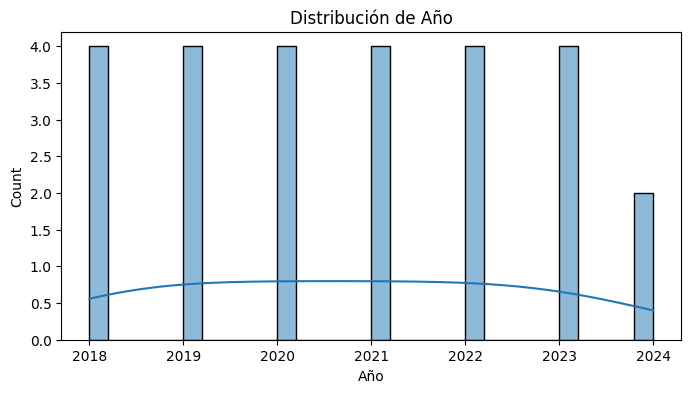

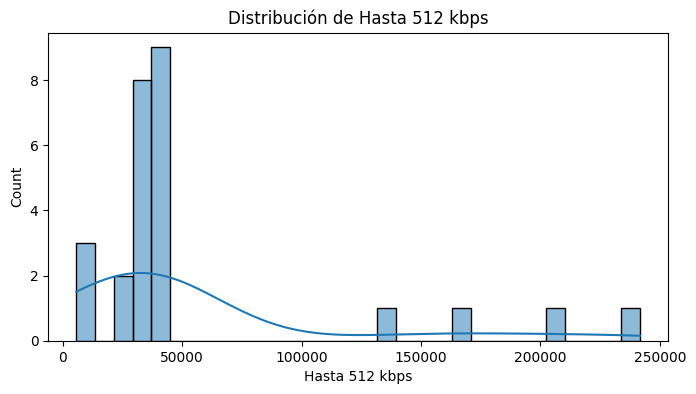

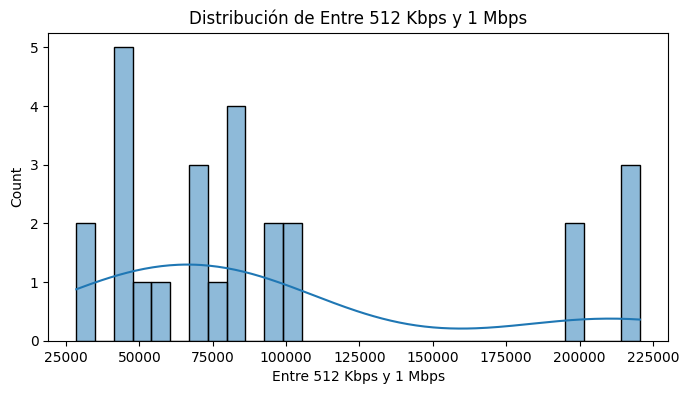

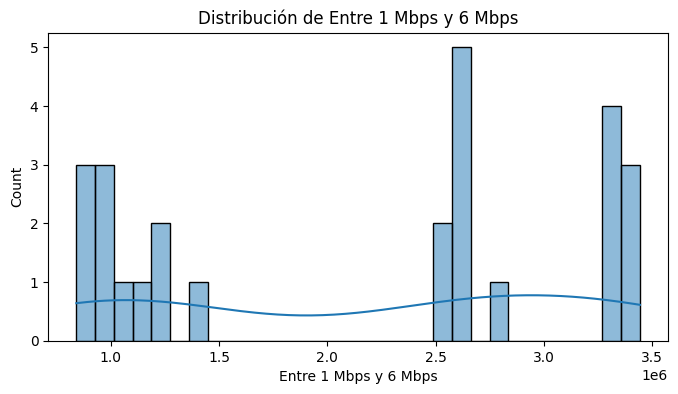

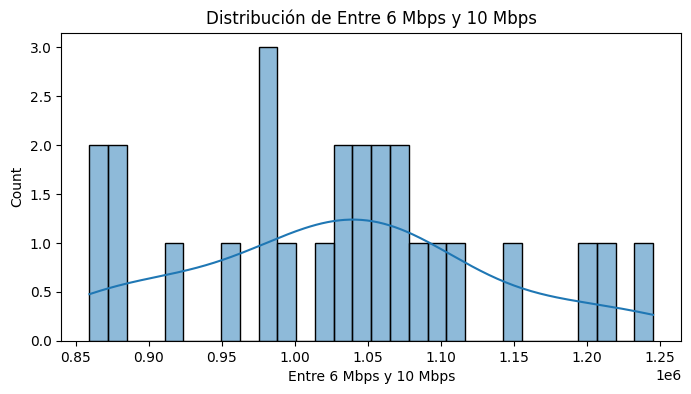

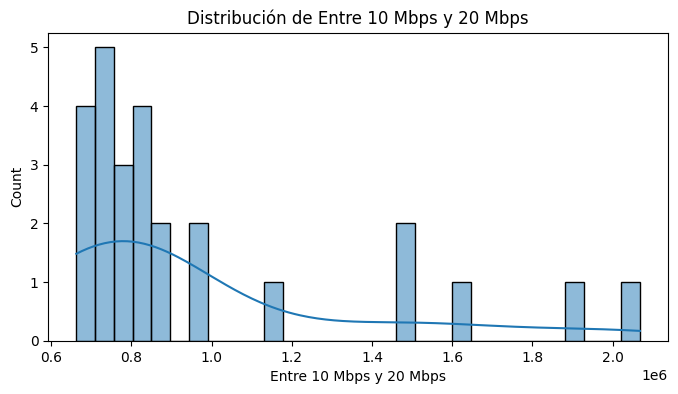

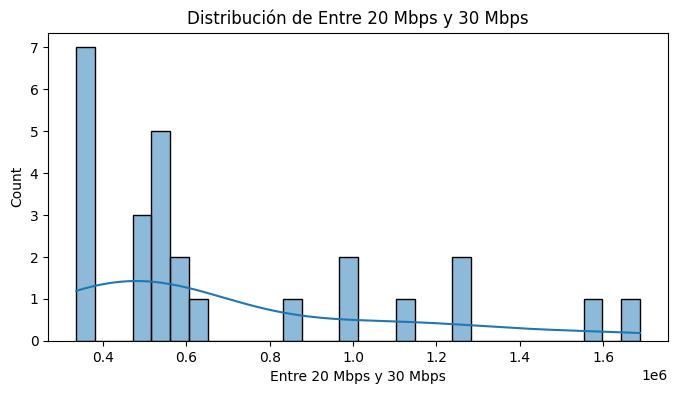

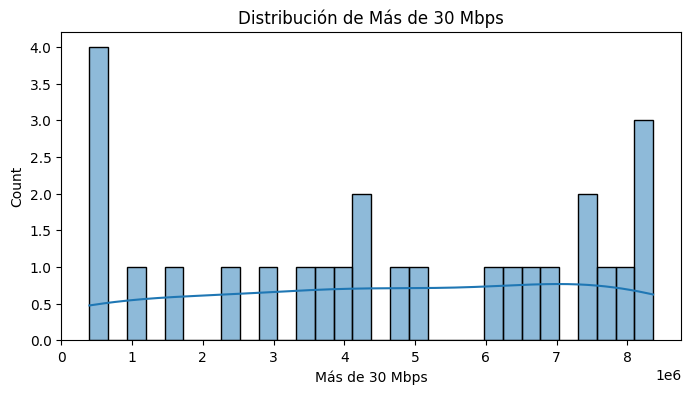

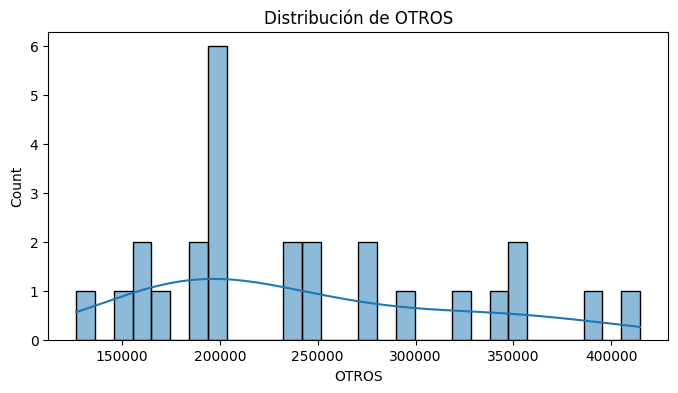

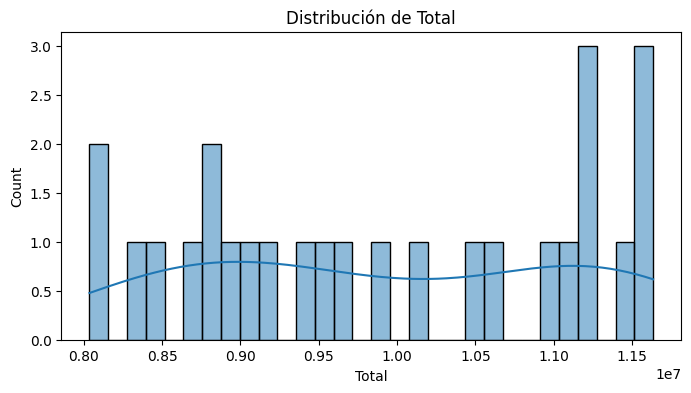

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma de una columna numérica (ajusta según tu DataFrame)
for col in df_Totales_Accesos_por_rango.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_Totales_Accesos_por_rango[col], kde=True, bins=30)
    plt.title(f'Distribución de {col}')
    plt.show()


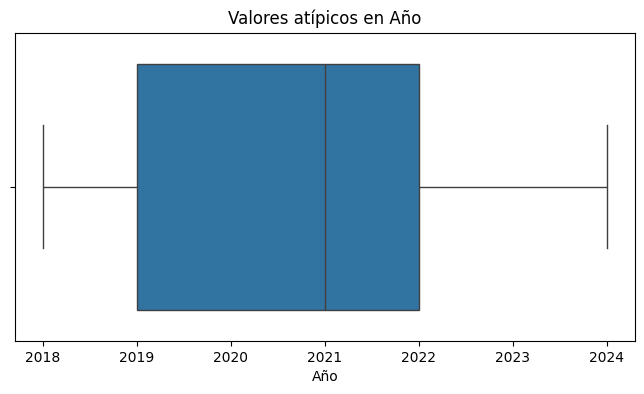

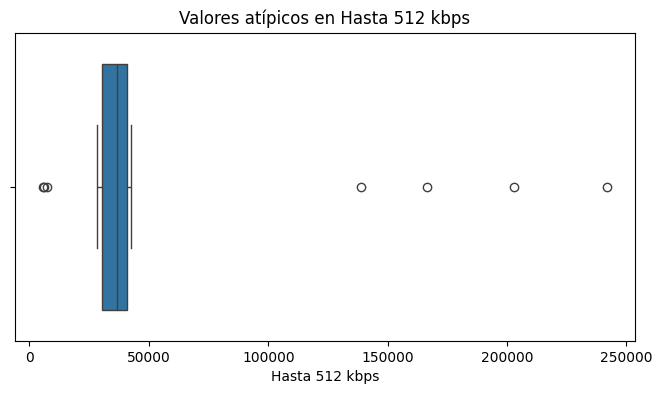

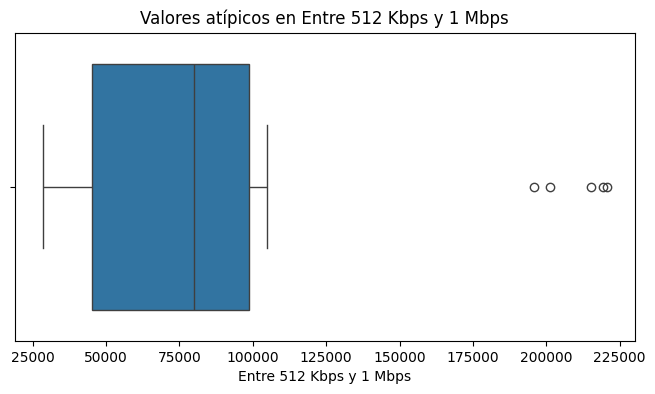

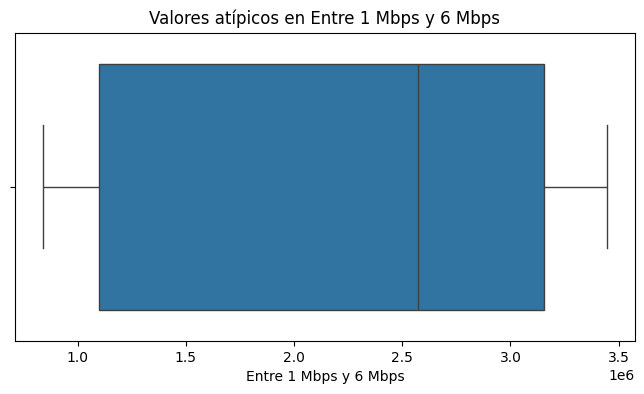

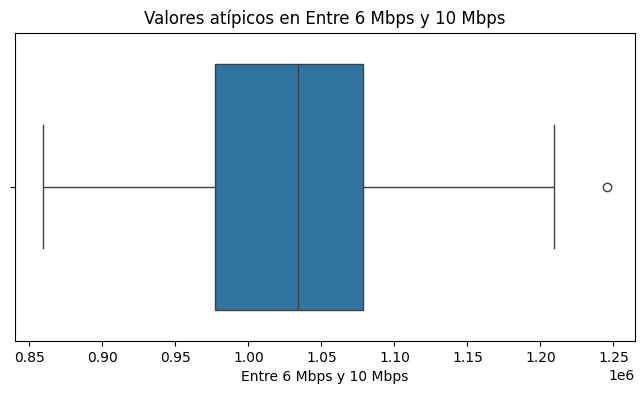

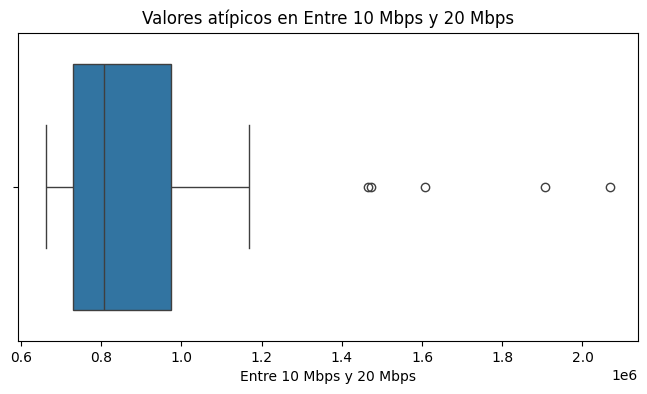

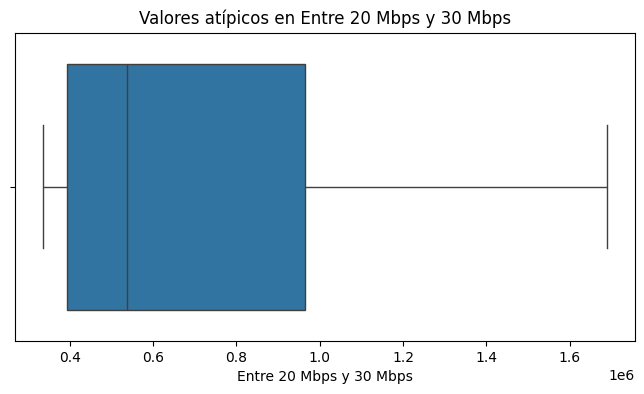

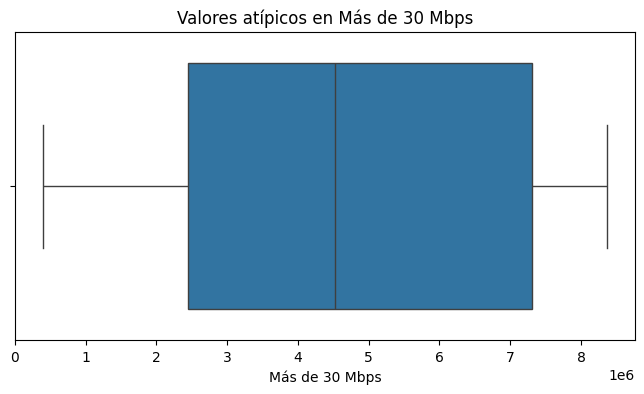

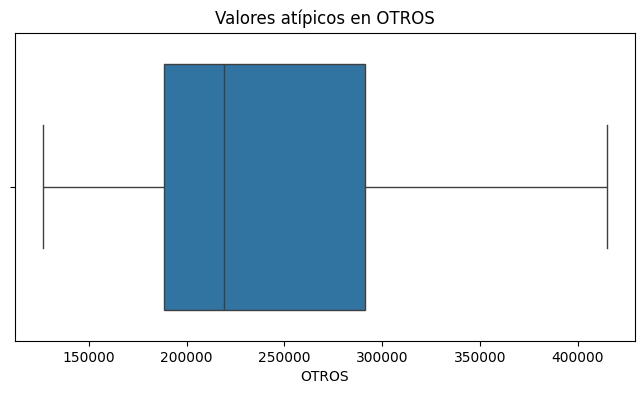

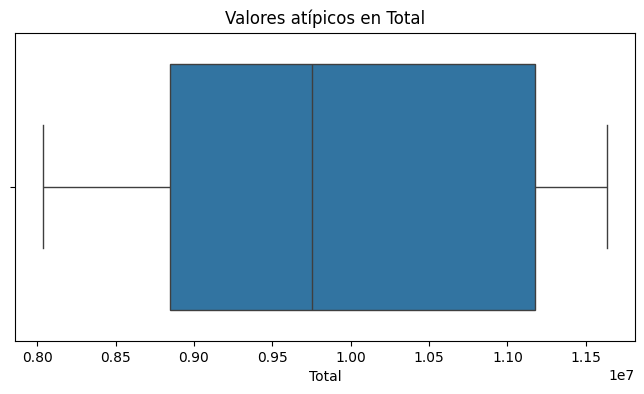

In [10]:
for col in df_Totales_Accesos_por_rango.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df_Totales_Accesos_por_rango, x=col)
    plt.title(f'Valores atípicos en {col}')
    plt.show()


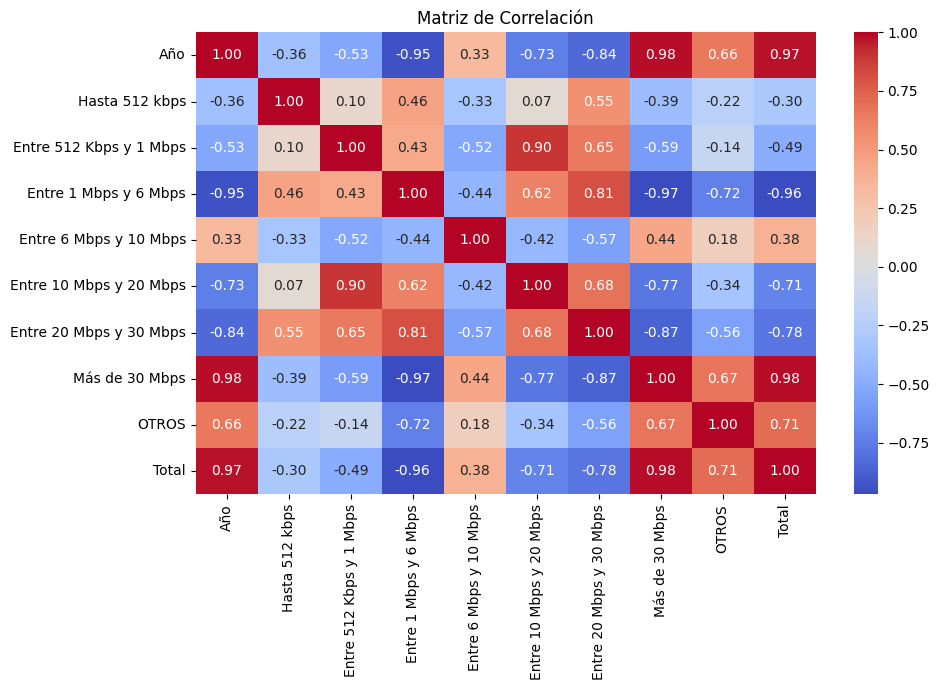

In [13]:
# Seleccionar solo columnas numéricas
df_corr = df_Totales_Accesos_por_rango.select_dtypes(include=['number'])

# Verificar si el DataFrame de correlaciones no está vacío
if df_corr.empty:
    print("No hay columnas numéricas para calcular la matriz de correlación.")
else:
    # Crear el mapa de calor
    plt.figure(figsize=(10, 6))
    sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
    plt.title('Matriz de Correlación')
    plt.show()


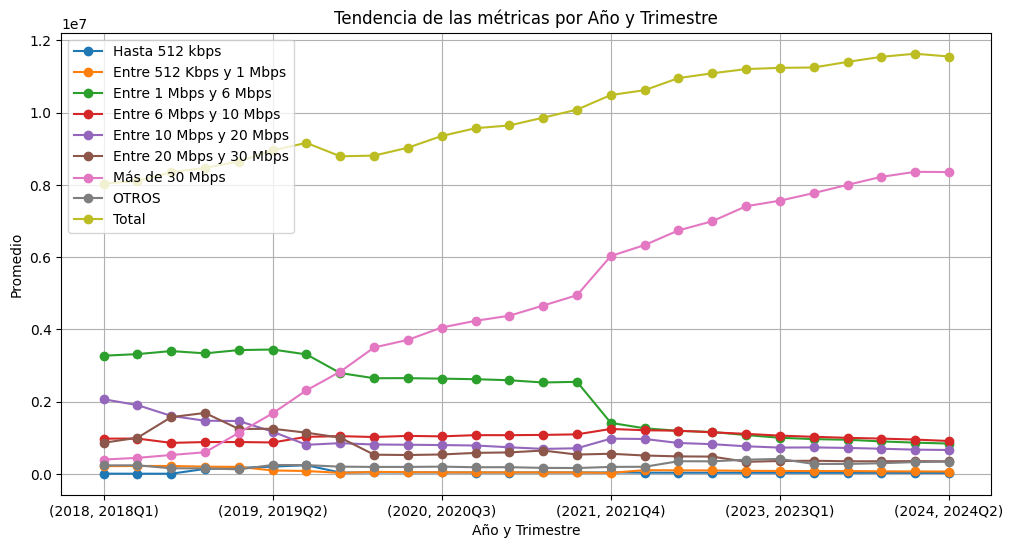

In [12]:
# Promedio por Año y Trimestre
df_grouped = df_Totales_Accesos_por_rango.groupby(['Año', 'Trimestre']).mean()

# Gráfica de tendencias
df_grouped.plot(figsize=(12, 6), marker='o')
plt.title('Tendencia de las métricas por Año y Trimestre')
plt.xlabel('Año y Trimestre')
plt.ylabel('Promedio')
plt.grid(True)
plt.show()


In [14]:
# Sobrescribir el archivo original con las transformaciones realizadas
df_Totales_Accesos_por_rango.to_csv(archivo_csv, index=False)

print(f"Las transformaciones se han guardado en el archivo original: {archivo_csv}")


Las transformaciones se han guardado en el archivo original: C:/Users/Usuario/PI_2/DATA_LIMPIO/Totales Accesos por rango.csv
